# Module: Machine learning project


# Title: Concrete compressive strength


# Data Set Information:
* Number of instances 1030
* Number of Attributes 9
* Attribute breakdown 8 quantitative input variables, and 1 quantitative output variable
* Missing Attribute Values Non

# Dataset description
* Cement----------------quantitative -- kg in a m3 mixture ---Input Variable
* BlastFurnaceSlag----quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash---------------quantitative -- kg in a m3 mixture -- Input Variable
* Water-----------------quantitative -- kg in a m3 mixture ---Input Variable
* Superplasticizer------quantitative -- kg in a m3 mixture ---Input Variable
* CoarseAggregate------quantitative -- kg in a m3 mixture ---Input Variable
* FineAggregate -------quantitative -- kg in a m3 mixture ---Input Variable
* Age-------------------quantitative -- Day (1~365) ----------Input Variable
* CC_Strength-----------quantitative -- MPa ------------------Output Variable

# Steps to perform in Project:

## Importing necessary libraries:

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression       # Linear regression
from sklearn.linear_model import LogisticRegression     # Logistic regression
from sklearn.linear_model import Lasso                  # Lasso Regression
from sklearn.linear_model import Ridge                  # Ridge Regression
from sklearn.tree import DecisionTreeRegressor          # Decisiontree regressor
from sklearn.neighbors import KNeighborsRegressor       # KNN Neighbor
from sklearn.svm import SVR                             # SVM
from sklearn.ensemble import RandomForestRegressor      # RF regressor

from sklearn.model_selection import train_test_split    # Splitting dataset into training and test data
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  #compute the metrics
import itertools as it
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from sklearn import utils

from sklearn.model_selection import KFold              #importing the K fold
from sklearn.model_selection import cross_val_score    #importing the cross validation score
from sklearn import preprocessing                      #importing the preprocessing library
from scipy.stats import uniform 
from sklearn.model_selection import RandomizedSearchCV #RandomSearch
from sklearn.model_selection import GridSearchCV       #Gridsearch
from sklearn.metrics import classification_report      #Classification
from random import randint                             #random



##  Read the dataset into the notebook

In [2]:
data=pd.read_excel('Concrete_Data.xls')

In [3]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


##  Print the shape of the data

In [4]:
data.shape

(1030, 9)

In [5]:
print('Number of rows',data.shape[0])
print('Number of columns',data.shape[1])

Number of rows 1030
Number of columns 9


### Changing column names for easy handling:

In [6]:

new_column_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregate", "Age", "CC_Strength"]
current_column_names = list(data.columns)

mapper = {}
for i, name in enumerate(current_column_names):
    mapper[name] = new_column_names[i]

data = data.rename(columns=mapper)


In [7]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   BlastFurnaceSlag  1030 non-null   float64
 2   FlyAsh            1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   CoarseAggregate   1030 non-null   float64
 6   FineAggregate     1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CC_Strength       1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [9]:
data.dtypes

Cement              float64
BlastFurnaceSlag    float64
FlyAsh              float64
Water               float64
Superplasticizer    float64
CoarseAggregate     float64
FineAggregate       float64
Age                   int64
CC_Strength         float64
dtype: object

## Feature Selection

####  List out the feature variables and their data-types

* Input/Independent/Feature variables=Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age

* Data types of all feature variables is float64 except age.Age feature is int64 as dtype

####  List out response variable and its data type

* Output/Dependent/Response variable= CC_Strength

* Data type= float64

## Check for null values in the feature variables

In [10]:
#data.isnull()
data.isna().sum()

Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer    0
CoarseAggregate     0
FineAggregate       0
Age                 0
CC_Strength         0
dtype: int64

##### Observations:
* There are no null values in the data

In [11]:
#data.describe()
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.165631,104.507142,102.000000,192.375000,272.900000,350.000000,540.000000
BlastFurnaceSlag,1030.0,73.895485,86.279104,0.000000,0.000000,22.000000,142.950000,359.400000
FlyAsh,1030.0,54.187136,63.996469,0.000000,0.000000,0.000000,118.270000,200.100000
Water,1030.0,181.566359,21.355567,121.750000,164.900000,185.000000,192.000000,247.000000
Superplasticizer,1030.0,6.203112,5.973492,0.000000,0.000000,6.350000,10.160000,32.200000
CoarseAggregate,1030.0,972.918592,77.753818,801.000000,932.000000,968.000000,1029.400000,1145.000000
FineAggregate,1030.0,773.578883,80.175427,594.000000,730.950000,779.510000,824.000000,992.600000
Age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
CC_Strength,1030.0,35.817836,16.705679,2.331808,23.707115,34.442774,46.136287,82.599225


##### Observations:
* It gives the descriptive statistics(mean,mode,median,percentiles,min,max,standard deviation) and count of the columns.
* We can see that cement,BlastFurnaceSlag,flyash are left skwed(negative).

# Exploratory data analysis
*  Univariate analysis 
*  Bivariate analysis
*  Multivariate analysis

## Check for outliers

##### CEMENT

In [12]:
#Quartiles
from scipy import stats

Q1=data["Cement"].quantile(q=0.25)
Q3=data["Cement"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["Cement"]))

1st Quartile (Q1) is : 192.375
3rd Quartile (Q3) is : 350.0
Interquartile range (IQR) is :  157.625


In [13]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in cement :",lower_outliers)
print("Upper outliers limit in cement :",upper_outliers)

Lower outliers limit in cement : -44.0625
Upper outliers limit in cement : 586.4375


In [14]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in cement upper :",data[data["Cement"]>586.4375]["Cement"].count())
print("Number of outliers in cement lower :",data[data["Cement"]<-44.0625]["Cement"].count())

print("% of outliers in cement upper :",round(data[data["Cement"]>586.4375]["Cement"].count()*100/len(data)),'%')
print("% of outliers in cement lower :",round(data[data["Cement"]<-44.0625]["Cement"].count()*100/len(data)),'%')

Number of outliers in cement upper : 0
Number of outliers in cement lower : 0
% of outliers in cement upper : 0 %
% of outliers in cement lower : 0 %


<AxesSubplot:xlabel='Cement'>

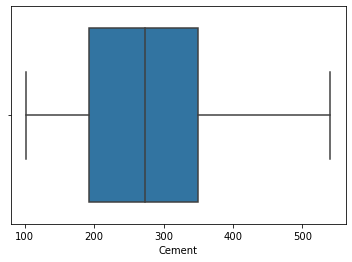

In [15]:
#Distribution of Cement

sns.boxplot(x="Cement",data=data,orient="h")

##### WATER

In [16]:
#Quartiles
from scipy import stats

Q1=data["Water"].quantile(q=0.25)
Q3=data["Water"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["Water"]))

1st Quartile (Q1) is : 164.9
3rd Quartile (Q3) is : 192.0
Interquartile range (IQR) is :  27.099999999999994


In [17]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in water :",lower_outliers)
print("Upper outliers limit in water :",upper_outliers)

Lower outliers limit in water : 124.25000000000001
Upper outliers limit in water : 232.64999999999998


In [18]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in water upper :",data[data["Water"]> 232.649999999999985]["Water"].count())
print("Number of outliers in water lower :",data[data["Water"]<124.250000000000015]["Water"].count())

print("% of outliers in water upper :",round(data[data["Water"]> 232.64999999999998]["Water"].count()*100/len(data)),'%')
print("% of outliers in water lower :",round(data[data["Water"]<124.25000000000001]["Water"].count()*100/len(data)),'%')

Number of outliers in water upper : 4
Number of outliers in water lower : 5
% of outliers in water upper : 0 %
% of outliers in water lower : 0 %


<AxesSubplot:xlabel='Water'>

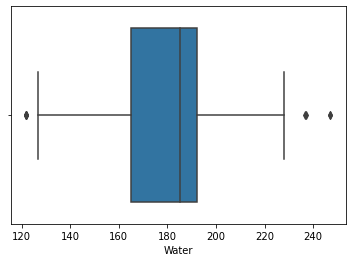

In [19]:
#Distribution of Cement

sns.boxplot(x="Water",data=data,orient="h")

C:\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'water')

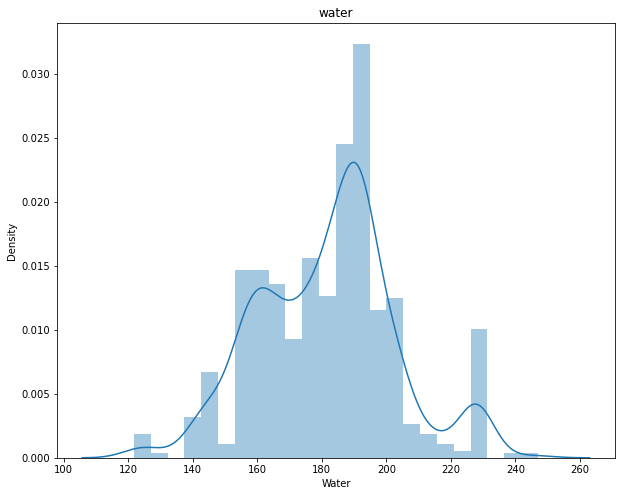

In [20]:
plt.figure(figsize=(10,8))
sns.distplot(data["Water"]).set_title("water")

##### BlastFurnaceSlag

In [21]:
#Quartiles
from scipy import stats

Q1=data["BlastFurnaceSlag"].quantile(q=0.25)
Q3=data["BlastFurnaceSlag"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["BlastFurnaceSlag"]))

1st Quartile (Q1) is : 0.0
3rd Quartile (Q3) is : 142.95
Interquartile range (IQR) is :  142.95


In [22]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in BlastFurnaceSlag :",lower_outliers)
print("Upper outliers limit in BlastFurnaceSlag :",upper_outliers)

Lower outliers limit in BlastFurnaceSlag : -214.42499999999998
Upper outliers limit in BlastFurnaceSlag : 357.375


In [23]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in BlastFurnaceSlag upper :",data[data["BlastFurnaceSlag"]> 357.375]["BlastFurnaceSlag"].count())
print("Number of outliers in BlastFurnaceSlag lower :",data[data["BlastFurnaceSlag"]<-214.42499999999998]["BlastFurnaceSlag"].count())

print("% of outliers in BlastFurnaceSlag upper :",round(data[data["BlastFurnaceSlag"]> 357.375]["BlastFurnaceSlag"].count()*100/len(data)),'%')
print("% of outliers in BlastFurnaceSlag lower :",round(data[data["BlastFurnaceSlag"]<-214.42499999999998]["BlastFurnaceSlag"].count()*100/len(data)),'%')

Number of outliers in BlastFurnaceSlag upper : 2
Number of outliers in BlastFurnaceSlag lower : 0
% of outliers in BlastFurnaceSlag upper : 0 %
% of outliers in BlastFurnaceSlag lower : 0 %


<AxesSubplot:xlabel='BlastFurnaceSlag'>

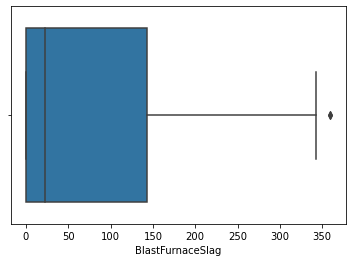

In [24]:
#Distribution of Cement

sns.boxplot(x="BlastFurnaceSlag",data=data,orient="h")

##### Age

In [25]:
#Quartiles
from scipy import stats

Q1=data["Age"].quantile(q=0.25)
Q3=data["Age"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["Age"]))

1st Quartile (Q1) is : 7.0
3rd Quartile (Q3) is : 56.0
Interquartile range (IQR) is :  49.0


In [26]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in Age :",lower_outliers)
print("Upper outliers limit in Age :",upper_outliers)

Lower outliers limit in Age : -66.5
Upper outliers limit in Age : 129.5


In [27]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in Age upper :",data[data["Age"]>129.5]["Age"].count())
print("Number of outliers in Age lower :",data[data["Age"]<-66.5]["Age"].count())

print("% of outliers in Age upper :",round(data[data["Age"]>129.5]["Age"].count()*100/len(data)),'%')
print("% of outliers in Age lower :",round(data[data["Age"]<-66.5]["Age"].count()*100/len(data)),'%')

Number of outliers in Age upper : 59
Number of outliers in Age lower : 0
% of outliers in Age upper : 6 %
% of outliers in Age lower : 0 %


<AxesSubplot:xlabel='Age'>

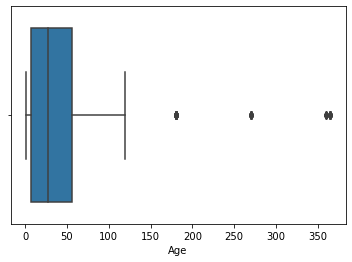

In [28]:
#Distribution of Cement

sns.boxplot(x="Age",data=data,orient="h")

##### FlyAsh

In [29]:
#Quartiles
from scipy import stats

Q1=data["FlyAsh"].quantile(q=0.25)
Q3=data["FlyAsh"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["FlyAsh"]))

1st Quartile (Q1) is : 0.0
3rd Quartile (Q3) is : 118.27
Interquartile range (IQR) is :  118.27


In [30]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in FlyAsh :",lower_outliers)
print("Upper outliers limit in FlyAsh :",upper_outliers)

Lower outliers limit in FlyAsh : -177.405
Upper outliers limit in FlyAsh : 295.675


In [31]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in FlyAsh upper :",data[data["FlyAsh"]>295.675]["FlyAsh"].count())
print("Number of outliers in FlyAsh lower :",data[data["FlyAsh"]<-177.405]["FlyAsh"].count())

print("% of outliers in FlyAsh upper :",round(data[data["FlyAsh"]>295.675]["FlyAsh"].count()*100/len(data)),'%')
print("% of outliers in FlyAsh lower :",round(data[data["FlyAsh"]<-177.405]["FlyAsh"].count()*100/len(data)),'%')

Number of outliers in FlyAsh upper : 0
Number of outliers in FlyAsh lower : 0
% of outliers in FlyAsh upper : 0 %
% of outliers in FlyAsh lower : 0 %


<AxesSubplot:xlabel='FlyAsh'>

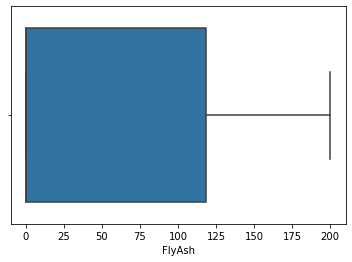

In [32]:
#Distribution of Cement

sns.boxplot(x="FlyAsh",data=data,orient="h")

##### Superplasticizer

In [33]:
#Quartiles
from scipy import stats

Q1=data["Superplasticizer"].quantile(q=0.25)
Q3=data["Superplasticizer"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["Superplasticizer"]))

1st Quartile (Q1) is : 0.0
3rd Quartile (Q3) is : 10.16
Interquartile range (IQR) is :  10.16


In [34]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in Superplasticizer :",lower_outliers)
print("Upper outliers limit in Superplasticizer :",upper_outliers)

Lower outliers limit in Superplasticizer : -15.24
Upper outliers limit in Superplasticizer : 25.4


In [35]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in Superplasticizer upper :",data[data["Superplasticizer"]>25.4]["Superplasticizer"].count())
print("Number of outliers in Superplasticizer lower :",data[data["Superplasticizer"]<-15.24]["Superplasticizer"].count())

print("% of outliers in Superplasticizer upper :",round(data[data["Superplasticizer"]>25.4]["Superplasticizer"].count()*100/len(data)),'%')
print("% of outliers in Superplasticizer lower :",round(data[data["Superplasticizer"]<-15.24]["Superplasticizer"].count()*100/len(data)),'%')

Number of outliers in Superplasticizer upper : 10
Number of outliers in Superplasticizer lower : 0
% of outliers in Superplasticizer upper : 1 %
% of outliers in Superplasticizer lower : 0 %


<AxesSubplot:xlabel='Superplasticizer'>

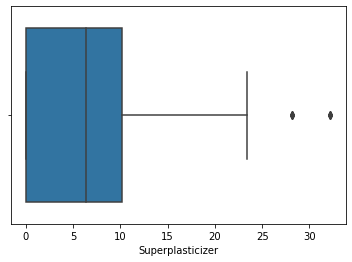

In [36]:
#Distribution of Cement

sns.boxplot(x="Superplasticizer",data=data,orient="h")

##### CoarseAggregate        

In [37]:
#Quartiles
from scipy import stats

Q1=data["CoarseAggregate"].quantile(q=0.25)
Q3=data["CoarseAggregate"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["CoarseAggregate"]))

1st Quartile (Q1) is : 932.0
3rd Quartile (Q3) is : 1029.4
Interquartile range (IQR) is :  97.40000000000009


In [38]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in CoarseAggregate :",lower_outliers)
print("Upper outliers limit in CoarseAggregate :",upper_outliers)

Lower outliers limit in CoarseAggregate : 785.8999999999999
Upper outliers limit in CoarseAggregate : 1175.5000000000002


In [39]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in CoarseAggregate upper :",data[data["CoarseAggregate"]>1175.5000000000002]["CoarseAggregate"].count())
print("Number of outliers in CoarseAggregate lower :",data[data["CoarseAggregate"]<785.8999999999999]["CoarseAggregate"].count())

print("% of outliers in CoarseAggregate upper :",round(data[data["CoarseAggregate"]>1175.5000000000002]["CoarseAggregate"].count()*100/len(data)),'%')
print("% of outliers in CoarseAggregate lower :",round(data[data["CoarseAggregate"]<785.8999999999999]["CoarseAggregate"].count()*100/len(data)),'%')

Number of outliers in CoarseAggregate upper : 0
Number of outliers in CoarseAggregate lower : 0
% of outliers in CoarseAggregate upper : 0 %
% of outliers in CoarseAggregate lower : 0 %


<AxesSubplot:xlabel='CoarseAggregate'>

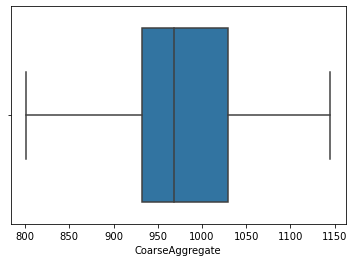

In [40]:
#Distribution of Cement

sns.boxplot(x="CoarseAggregate",data=data,orient="h")

##### FineAggregate       

In [41]:
#Quartiles
from scipy import stats

Q1=data["FineAggregate"].quantile(q=0.25)
Q3=data["FineAggregate"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["FineAggregate"]))

1st Quartile (Q1) is : 730.9499999999999
3rd Quartile (Q3) is : 824.0
Interquartile range (IQR) is :  93.05000000000007


In [42]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in FineAggregate :",lower_outliers)
print("Upper outliers limit in FineAggregate :",upper_outliers)

Lower outliers limit in FineAggregate : 591.3749999999998
Upper outliers limit in FineAggregate : 963.575


In [43]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in FineAggregate upper :",data[data["FineAggregate"]>963.575]["FineAggregate"].count())
print("Number of outliers in FineAggregate lower :",data[data["FineAggregate"]<591.3749999999998]["FineAggregate"].count())

print("% of outliers in FineAggregate upper :",round(data[data["FineAggregate"]>963.575]["FineAggregate"].count()*100/len(data)),'%')
print("% of outliers in FineAggregate lower :",round(data[data["FineAggregate"]<591.3749999999998]["FineAggregate"].count()*100/len(data)),'%')

Number of outliers in FineAggregate upper : 5
Number of outliers in FineAggregate lower : 0
% of outliers in FineAggregate upper : 0 %
% of outliers in FineAggregate lower : 0 %


<AxesSubplot:xlabel='FineAggregate'>

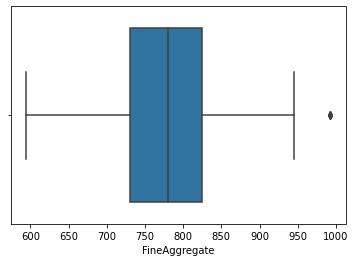

In [44]:
#Distribution of Cement

sns.boxplot(x="FineAggregate",data=data,orient="h")

##### CC_Strength

In [45]:
#Quartiles
from scipy import stats

Q1=data["CC_Strength"].quantile(q=0.25)
Q3=data["CC_Strength"].quantile(q=0.75)

print("1st Quartile (Q1) is :",Q1)
print("3rd Quartile (Q3) is :",Q3)
print("Interquartile range (IQR) is : ",stats.iqr(data["CC_Strength"]))

1st Quartile (Q1) is : 23.707115153
3rd Quartile (Q3) is : 46.13628653999999
Interquartile range (IQR) is :  22.429171386999993


In [46]:
#Outlier detection from IQR

lower_outliers=Q1-1.5*(Q3-Q1)
upper_outliers=Q3+1.5*(Q3-Q1)

print("Lower outliers limit in CC_Strength :",lower_outliers)
print("Upper outliers limit in CC_Strength :",upper_outliers)

Lower outliers limit in CC_Strength : -9.936641927499988
Upper outliers limit in CC_Strength : 79.78004362049998


In [47]:
#checking presence of outliers with upper and lower limits

print("Number of outliers in CC_Strength upper :",data[data["CC_Strength"]>79.78004362049998]["CC_Strength"].count())
print("Number of outliers in CC_Strength lower :",data[data["CC_Strength"]<-9.936641927499988]["CC_Strength"].count())

print("% of outliers in CC_Strength upper :",round(data[data["CC_Strength"]>79.78004362049998]["CC_Strength"].count()*100/len(data)),'%')
print("% of outliers in CC_Strength lower :",round(data[data["CC_Strength"]<-9.936641927499988]["CC_Strength"].count()*100/len(data)),'%')

Number of outliers in CC_Strength upper : 4
Number of outliers in CC_Strength lower : 0
% of outliers in CC_Strength upper : 0 %
% of outliers in CC_Strength lower : 0 %


<AxesSubplot:xlabel='CC_Strength'>

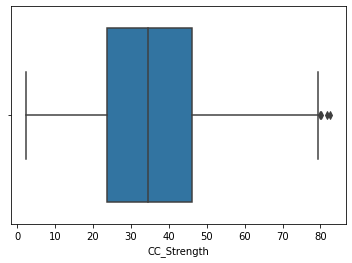

In [48]:
#Distribution of Cement

sns.boxplot(x="CC_Strength",data=data,orient="h")

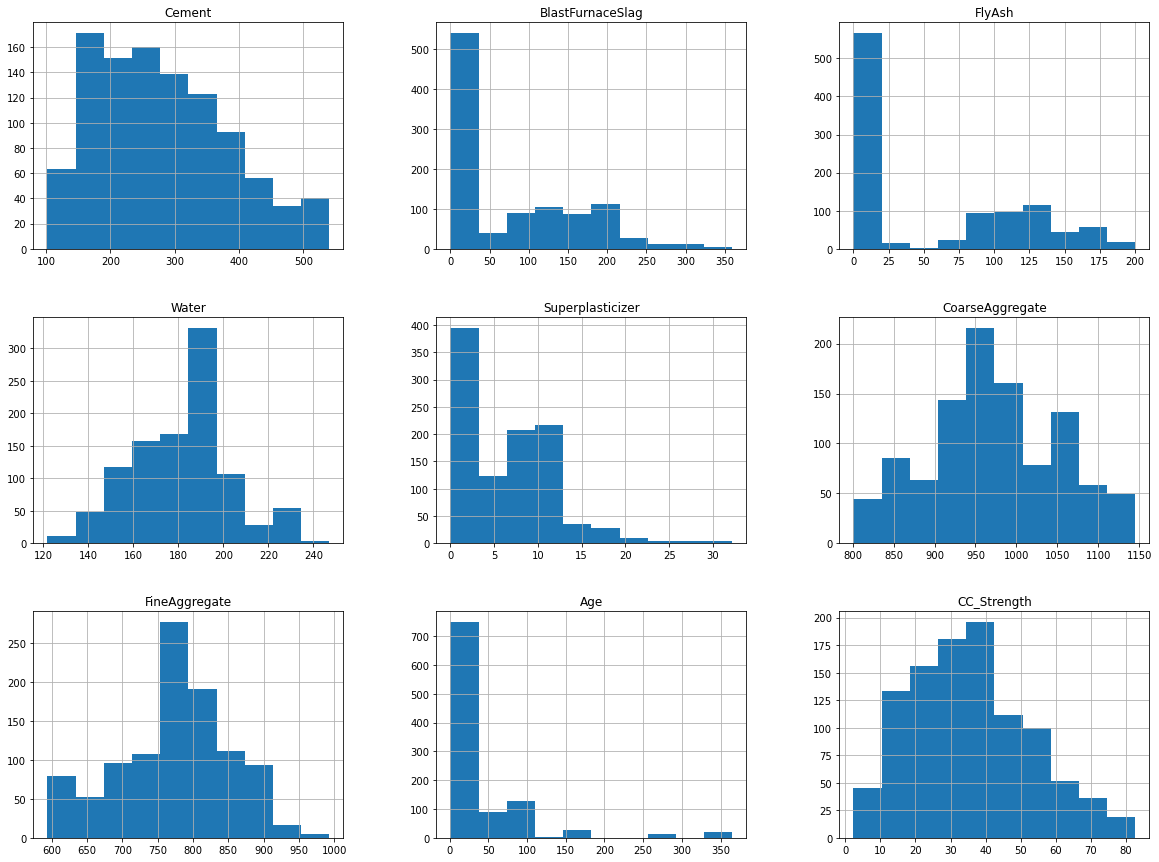

In [49]:
data.hist(figsize=(20, 15))
plt.show()

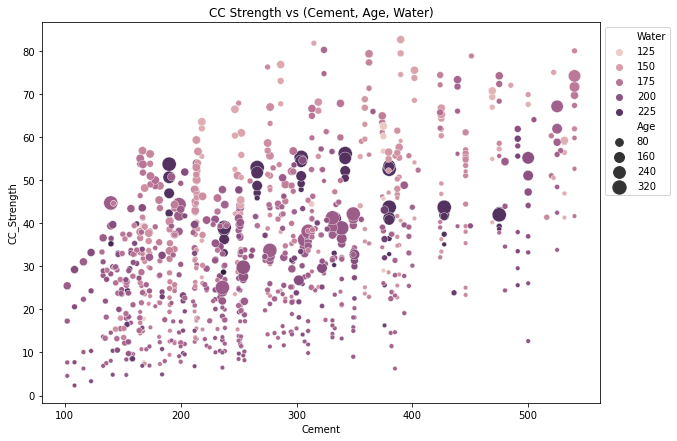

In [50]:
fig, ax = plt.subplots(figsize=(10,7))
sns.scatterplot(y="CC_Strength", x="Cement", hue="Water", size="Age", data=data, ax=ax, sizes=(20, 200))
ax.set_title("CC Strength vs (Cement, Age, Water)")
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.show()

#### Conclusions from CC_Strength vs (Cement, Age, Water)
* Compressive strength increases with amount of Cement
* Compressive strength increases with Age
* Cement with low age requires more Cement for higher strength
* The older the Cement is the more water it requires
* Concrete strength increases when less Water is used in preparing it

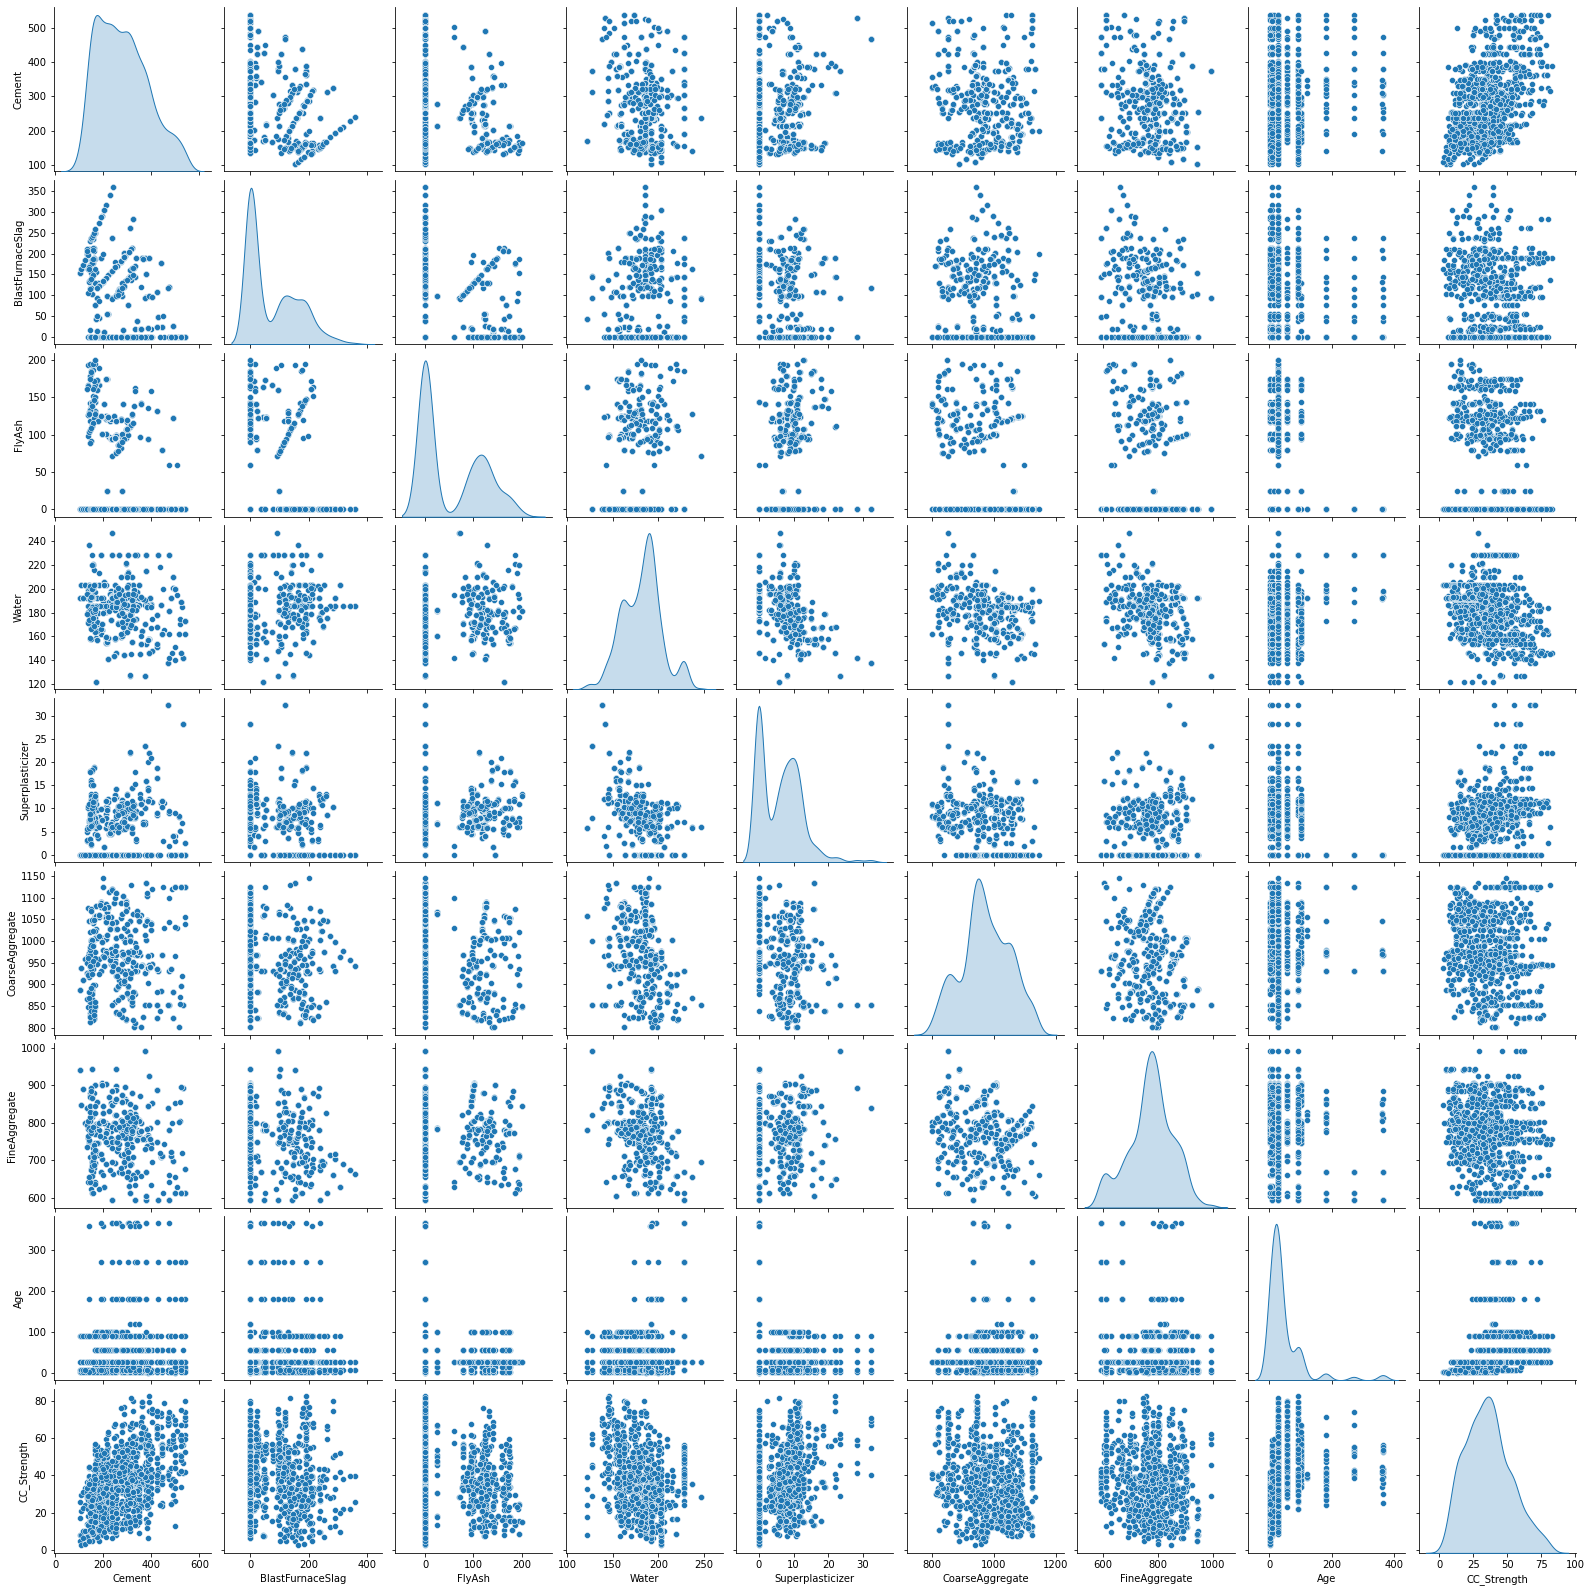

In [51]:
sns.pairplot(data,diag_kind='kde')
plt.show()

##### Observations:

* Diagonal analysis + pair plots analysis
* Distribution of Cement appears nearly normal
* BlastFurnaceSlag and FlyAsh are 2 gaussians and is skewed
* Water and Superplasticizer are near normal distributions
* Age data has long tail which confirms the presence of outliers
* CC_Strength is normally distributed
* Off-diagonal analysis with CC_Strength
* BlastFurnaceSlag is a very weak predictor because the distribution is like a cloud
* FlyAsh,coarseagg and fineagg are also weak predictors
* Off-diagonal analysis between other features

## Correlation between Variables

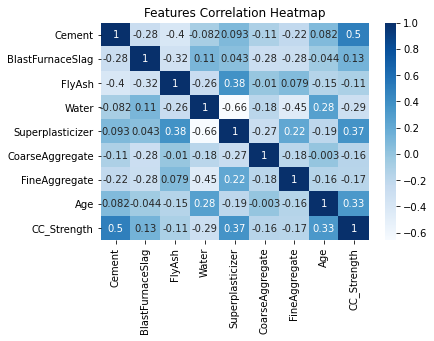

In [52]:
#method 1
corr = data.corr()   #dataframe.correlation

sns.heatmap(corr, annot=True, cmap='Blues')
b, t = plt.ylim()   #ylim=Y-limits and b,t=bottom,top parameters
plt.ylim(b,t)       #b,t returns the tuple of the new y-axis limits
plt.title("Features Correlation Heatmap")
plt.show()

#ylim() function is used to get or set the y-limits of the current axes

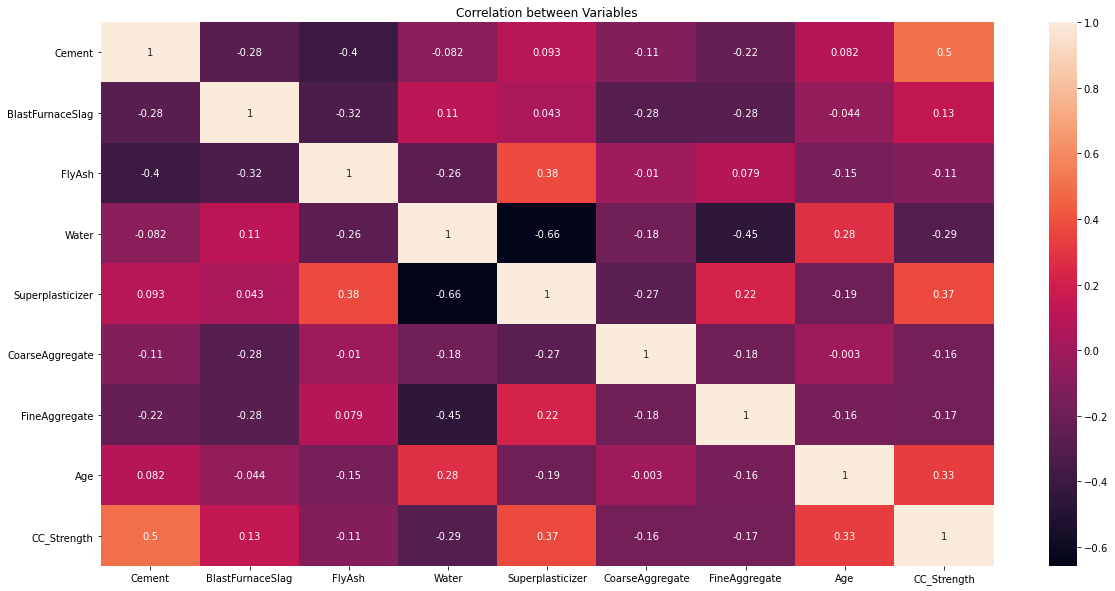

In [53]:
#method 2
corr = data.corr()
corr


plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.title("Correlation between Variables")
plt.show()

##### Observations:
* There seems to be no high correlation between independant variables (features). 
* This can be further confirmed by plotting the Pearson Correlation coefficients between the features.
* Cement has strong correlation with CC_Strength
* Water appears to have a negative correlation with strength
* Superplasticizer appears to have positive correlation with strength
* Age also has strong correlation with strength
* Cement and BlastFurnaceSlag have strong correlation
* Water and Superplasticizer have strong negative correlation

## Checking for outliers

<AxesSubplot:>

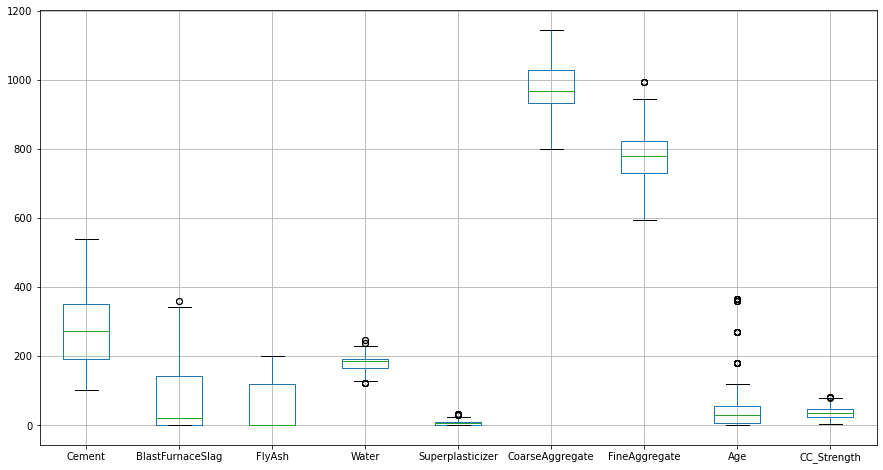

In [54]:
data.boxplot(figsize=(15,8))

##### Observations:
* Age column appears to be having maximum number of outliers
* BlastFurnaceSlag, Water, Superplasticizer, FineAggregate features have some outliers
* All features except age and strength have same units(kg in m3 mixture) but have different scales.
* Thus we might need to scale the data so as to avoid bias in algorithms

In [55]:
print("Outliers in Cement :",data[((data.Cement - data.Cement.mean()) / data.Cement.std()).abs()>3]["Cement"].count())
print("Outliers in BlastFurnaceSlag :",data[((data.BlastFurnaceSlag - data.BlastFurnaceSlag.mean()) / data.BlastFurnaceSlag.std()).abs()>3]["BlastFurnaceSlag"].count())
print("Outliers in Water :",data[((data.Water - data.Water.mean()) / data.Water.std()).abs()>3]["Water"].count())
print("Outliers in Superplasticizer :",data[((data.Superplasticizer - data.Superplasticizer.mean()) / data.Superplasticizer.std()).abs()>3]["Superplasticizer"].count())
print("Outliers in FineAggregate :",data[((data.FineAggregate - data.FineAggregate.mean()) / data.FineAggregate.std()).abs()>3]["FineAggregate"].count())
print("Outliers in FlyAsh :",data[((data.FlyAsh - data.FlyAsh.mean()) / data.FlyAsh.std()).abs()>3]["FlyAsh"].count())
print("Outliers in Age :",data[((data.Age - data.Age.mean())/data.Age.std()).abs()>3]["Age"].count())
print("Outliers in CoarseAggregate :",data[((data.CoarseAggregate - data.CoarseAggregate.mean()) / data.CoarseAggregate.std()).abs()>3]["CoarseAggregate"].count())
#print("Outliers in CC_Strength :",data[((data.CC_Strength - data.CC_Strength.mean()) / data.CC_Strength.std()).abs()>3]["CC_Strength"].count())

Outliers in Cement : 0
Outliers in BlastFurnaceSlag : 4
Outliers in Water : 2
Outliers in Superplasticizer : 10
Outliers in FineAggregate : 0
Outliers in FlyAsh : 0
Outliers in Age : 33
Outliers in CoarseAggregate : 0


## Replacing the outliers by median

In [56]:
for cols in data.columns[:-1]:
    Q1=data[cols].quantile(0.25)
    Q3=data[cols].quantile(0.75)
    iqr=Q3-Q1
    
    low=Q1-1.5*iqr
    high=Q3+1.5*iqr
    data.loc[(data[cols]<low)| (data[cols]>high),cols]=data[cols].median()

<AxesSubplot:>

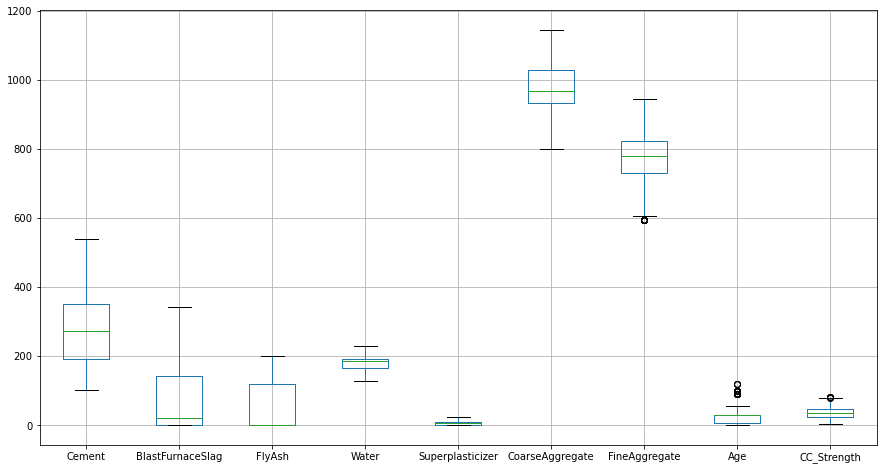

In [57]:
data.boxplot(figsize=(15,8))

##  What is the type of machine learning problem at hand? (Supervised or Unsupervised?) Why?


* This is Supervised Machine Learning problem.
* Because,In supervised learning the input and output variable concepts are present.
* As per this,In unsupervised learning labels like dependent variables is absent.

##  What is the category of the machine learning problem at hand? (Classification or Regression?) Why?


* As it is supervised learning problem,It should be two categories:Regression or Classification
* The data is numeric and continus.So,it is Regression problem.

In [58]:
data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.296075


# Data Preprocessing
* Separating Input Features and Target Variable.

In [59]:
#X = data.iloc[:,:-1]         # Features - All columns but last
#y = data.iloc[:,-1]          # Target - Last Column

X=data.drop("CC_Strength",axis=1)     #independent
y=data["CC_Strength"]                 #dependent

In [60]:
X.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28


In [61]:
y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: CC_Strength, dtype: float64

In [62]:
from scipy.stats import zscore

Xscaled=X.apply(zscore)
Xscaled_data=pd.DataFrame(Xscaled,columns=data.columns)

## Splitting data into Training and Test splits

In [63]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled, y, test_size=0.2, random_state=2)

In [64]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test)  

###   Below listed metrics are used for evaluating the performance of model:
* Accuracy
* RMSE
* MSE
* MAE

##  Performing the below algorithms to make prediction on this problem:
- Linear Regression
- Lasso Regression
- Ridge Regression
- Decision Tree Regressor
- Random Forest Regressor
- KNN Regressor
- SVM Regressor


# Model Building

## 1.Linear Regression

* Linear regression is one of the most popular and simple machine learning algorithms that is used for predictive analysis. 
* Here, predictive analysis defines prediction of something, and linear regression makes predictions for continuous numbers
* It tries to best fit a line between the dependent and independent variables, and this best fit line is knowns as the regression line.

In [65]:
# Linear Regression
lr = LinearRegression()

# Fitting models on Training data 
Model_1=lr.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = lr.predict(X_test)

#ACCURACY = TRAIN DATA SCORE
train_Acc_1=Model_1.score(X_train,y_train)          

##ACCURACY = TRAIN DATA SCORE
Acc_1=Model_1.score(X_test, y_test)                 

#ROOT MEAN SQUARE ERROR
RMSE_1=np.sqrt(mean_squared_error(y_test, y_pred_lr))

#MEAN SQUARED ERROR
MSE_1=mean_squared_error(y_test, y_pred_lr)

#MEAN ABSOLUTE ERROR
MAE_1=mean_absolute_error(y_test, y_pred_lr)

#R2-Score
R2_1=r2_score(y_test, y_pred_lr)

In [66]:
#equation of line

a= lr.coef_
b = lr.intercept_

print("slope : ", a)
print("intercept : ", b)

slope :  [10.11700249  5.23353177  1.79841918 -4.13577247  1.39314455 -1.23916235
 -2.13673351  8.51642215]
intercept :  35.96274673130089


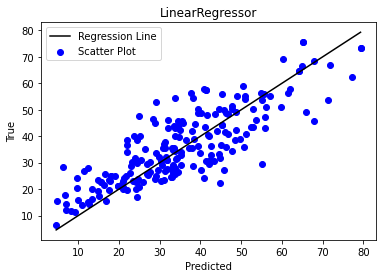

In [67]:
#Plotting Prediction
plt.scatter(y_test, y_pred_lr,color='blue', label='Scatter Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label = 'Regression Line')
plt.title('LinearRegressor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

##### Observations:-
* Looking at the graphs between predicted and true values of the target variable, we can conclude that Linear Regression perform well as the predictions are closer to the actual values. 

### K-fold cross validation

In [68]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(Model_1,X, y, cv=kfold)
accuracy1=np.mean(abs(results1))
SD1=results1.std()
print('Average accuracy: ',accuracy1)
print('Standard Deviation: ',SD1)

Average accuracy:  0.6564547751867382
Standard Deviation:  0.4958591704164341


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Hyperparameter Tunning

* For to tune linear regression there are 2 regularization models like lasso and ridge.

## 2.Lasso Regression

* Lasso regression is another regularization technique to reduce the complexity of the model.
* It stands for Least Absolute and Selection Operator.
* It is similar to the Ridge Regression except that the penalty term contains only the absolute weights instead of a square of weights.
* Since it takes absolute values, hence, it can shrink the slope to 0, whereas Ridge Regression can only shrink it near to 0.
* It is also called as L1 regularization.
* Some of the features in this technique are completely neglected for model evaluation.
* Hence, the Lasso regression can help us to reduce the overfitting in the model as well as the feature selection.

In [69]:

# Lasso Regression
lasso = Lasso()

# Fitting models on Training data 
Model_2=lasso.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lasso = lasso.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_2=Model_2.score(X_train,y_train)          

#ACCURACY = TEST DATA SCORE 
Acc_2=Model_2.score(X_test, y_test)                 

#ROOT MEAN SQUARE ERROR
RMSE_2=np.sqrt(mean_squared_error(y_test, y_pred_lasso))

#MEAN SQUARED ERROR
MSE_2=mean_squared_error(y_test, y_pred_lasso)

#MEAN ABSOLUTE ERROR
MAE_2=mean_absolute_error(y_test, y_pred_lasso)

#R2-Score
R2_2=r2_score(y_test, y_pred_lasso)

In [70]:
#equation of line

a= lasso.coef_
b = lasso.intercept_

print("slope : ", a)
print("intercept : ", b)

slope :  [ 8.57427444  3.57793185  0.         -1.77809179  2.93096303 -0.
 -0.77701391  7.4847606 ]
intercept :  35.96274673130089


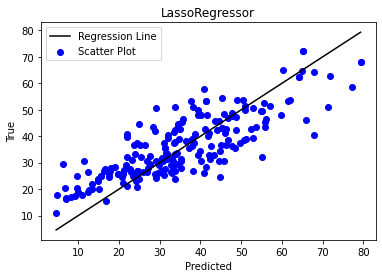

In [71]:
#Plotting Prediction
plt.scatter(y_test, y_pred_lasso,color='blue', label='Scatter Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label = 'Regression Line')
plt.title('LassoRegressor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

##### Observations:
* Lasso Regression reduces the complexity at the cost of loosing performance in this case. (The closer the points are to the black line, the less the error is.)

### K-fold cross validation

In [72]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results2 = cross_val_score(Model_2,X, y, cv=kfold)
accuracy2=np.mean(abs(results2))
SD2=results2.std()
print('Average accuracy: ',accuracy2)
print('Standard Deviation: ',SD2)

Average accuracy:  0.6514776674329125
Standard Deviation:  0.48922616636240657


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Hyperparameter Tunning

In [73]:
param_grid = {'alpha': uniform()}

rand_search = RandomizedSearchCV(estimator=lasso, 
                                 param_distributions=param_grid,
                                 n_iter=100)

rand_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Lasso(), n_iter=100,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021DD2135280>})

In [74]:
cv_result_dtr=pd.DataFrame(rand_search.cv_results_)
cv_result_dtr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002399,0.000489,0.001398,0.000799,0.287761,{'alpha': 0.28776090650157204},0.774883,0.762947,0.660371,0.736055,0.614588,0.709769,0.062062,35
1,0.003600,0.001496,0.001597,0.000487,0.0981139,{'alpha': 0.09811391418712723},0.779439,0.765874,0.656239,0.743744,0.617712,0.712602,0.063962,9
2,0.002795,0.000982,0.001402,0.000807,0.152715,{'alpha': 0.15271497564127612},0.778410,0.765332,0.657776,0.741823,0.617142,0.712097,0.063375,18
3,0.002198,0.000400,0.001000,0.000632,0.567907,{'alpha': 0.5679067807892796},0.763083,0.756511,0.660696,0.721281,0.607726,0.701860,0.059444,64
4,0.002200,0.000397,0.000998,0.000004,0.409487,{'alpha': 0.40948669589189646},0.770499,0.759802,0.661234,0.729617,0.611088,0.706448,0.061031,49


In [75]:
print("best_estimator : ",rand_search.best_estimator_.alpha)
print("best_params : ",rand_search.best_params_)
lasso_score=rand_search.best_score_
print("best_score :",lasso_score)


best_estimator :  0.015861712869482902
best_params :  {'alpha': 0.015861712869482902}
best_score : 0.7128948925443371


## 3.Ridge Regression

* Ridge regression is one of the types of linear regression in which a small amount of bias is introduced so that we can get better long-term predictions.
* Ridge regression is a regularization technique, which is used to reduce the complexity of the model. It is also called as L2 regularization.
* In this technique, the cost function is altered by adding the penalty term to it. 
* The amount of bias added to the model is called Ridge Regression penalty.
* We can calculate it by multiplying with the lambda to the squared weight of each individual feature.

In [76]:
# Ridge Regression
ridge = Ridge()

# Fitting models on Training data
Model_3=ridge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_ridge = ridge.predict(X_test)

#ACCURACY = TRAIN DATA SCORE  
train_Acc_3=Model_3.score(X_train,y_train)          

#ACCURACY = TEST DATA SCORE 
Acc_3=Model_3.score(X_test, y_test)                 

#ROOT MEAN SQUARE ERROR
RMSE_3=np.sqrt(mean_squared_error(y_test, y_pred_ridge))

#MEAN SQUARED ERROR
MSE_3=mean_squared_error(y_test, y_pred_ridge)

#MEAN ABSOLUTE ERROR
MAE_3=mean_absolute_error(y_test, y_pred_ridge)

#R2-Score
R2_3=r2_score(y_test, y_pred_ridge)

In [77]:
#equation of line

a= ridge.coef_
b = ridge.intercept_

print("slope : ", a)
print("intercept : ", b)

slope :  [10.04426225  5.16623645  1.7379437  -4.16514828  1.40489571 -1.27504597
 -2.18460055  8.50650404]
intercept :  35.96274673130089


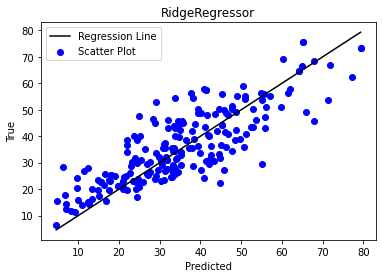

In [78]:
#Plotting Prediction
plt.scatter(y_test, y_pred_ridge,color='blue', label='Scatter Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label = 'Regression Line')
plt.title('RidgeRegressor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

##### Observations:-
* Looking at the graphs between predicted and true values of the target variable, we can conclude that Ridge Regression perform well as the predictions are closer to the actual values. 

### K-fold cross validation

In [79]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results3= cross_val_score(Model_3,X, y, cv=kfold)
accuracy3=np.mean(abs(results3))
SD3= results3.std()
print('Average accuracy: ',accuracy3)
print('Standard Deviation: ',SD3)

Average accuracy:  0.6564549237550354
Standard Deviation:  0.49585844688609765


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Hyperparameter Tunning

In [80]:
param_ridge=np.linspace(1,10,100)

param_grid_ridge = {'alpha': param_ridge}

grid_search_ridge= GridSearchCV(estimator=ridge, 
                                param_grid=param_grid_ridge, 
                                cv=5,
                                scoring='neg_mean_absolute_error')

grid_search_ridge.fit(X_train ,y_train)




GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.5...
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27272727,
        7.36363636,  7.45454545,  7.54545455,  7.63636364,  7.72727273,
        7.81818182,  7.90909091,  8.        ,  8.09090909,  8.18181818,
        8.27272727,  8.36363636,  8.45454545,  8.54545455,  8.63636364,
        8.72727273,  8.81818182,  8.90909091,  9.        ,  9.09090909,
        9.18181818,  9.27272727,  9.36363636,  9.45454545,  9.54545455,
        9.63636364,  9.72727273,  9.81818182,  9.90909091, 10.        ])},
       

In [81]:
best_score_ = float(format(grid_search_ridge.best_score_, '.4f'))
ridge_score=grid_search_ridge.best_score_

print('Best CV score: {:.4f}'.format(ridge_score))
print('Best parameter :',grid_search_ridge.best_params_)
print('Best estimator :',grid_search_ridge.best_estimator_)

Best CV score: -6.8308
Best parameter : {'alpha': 1.0}
Best estimator : Ridge()


## 4. Decision Trees

* A decision tree is a supervised learning algorithm that is mainly used to solve the classification problems but can also be used for solving the regression problems. 
* It can work with both categorical variables and continuous variables.
* It shows a tree-like structure that includes nodes and branches, and starts with the root node that expand on further branches till the leaf node. 
* The internal node is used to represent the features of the dataset, branches show the decision rules, and leaf nodes represent the outcome of the problem.

In [82]:
# Decision Tree Regression
dtr = DecisionTreeRegressor()

# Fitting models on Training data
Model_4=dtr.fit(X_train, y_train)

# Making predictions on Test data
y_pred_dtr = dtr.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_4=Model_4.score(X_train,y_train)          

#ACCURACY = TEST DATA SCORE 
Acc_4=Model_4.score(X_test, y_test)                

#ROOT MEAN SQUARE ERROR
RMSE_4=np.sqrt(mean_squared_error(y_test, y_pred_dtr))

#MEAN SQUARED ERROR
MSE_4=mean_squared_error(y_test, y_pred_dtr)

#MEAN ABSOLUTE ERROR
MAE_4=mean_absolute_error(y_test, y_pred_dtr)

#R2-Score
R2_4=r2_score(y_test, y_pred_dtr)

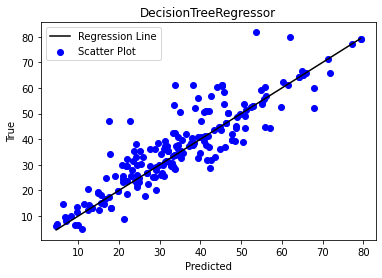

In [83]:
# plotting predictions
plt.scatter(y_test, y_pred_dtr,color='blue', label='Scatter Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label = 'Regression Line')
plt.title('DecisionTreeRegressor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

### K-fold cross validation

In [84]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results4 = cross_val_score(Model_4,X, y, cv=kfold)
accuracy4=np.mean(abs(results4))
SD4=results4.std()
print('Average accuracy: ',accuracy4)
print('Standard Deviation: ',SD4)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.6050633001867387
Standard Deviation:  0.4710494223233351


### Hyperparameter Tunning

In [85]:
# creating parameter for grid
param_dtr={'max_depth':[2,3,5,10],
       'min_samples_leaf':[5,10,20,50]}

grid_search_dtr = GridSearchCV(estimator=dtr,
                         param_grid=param_dtr,
                         cv=4,
                         n_jobs=-1
                        )

grid_search_dtr.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [5, 10, 20, 50]})

In [86]:
cv_result_dtr=pd.DataFrame(grid_search_dtr.cv_results_)
cv_result_dtr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003748,0.000434,0.001999,0.000706,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.477508,0.466345,0.457418,0.371778,0.443262,0.041881,13
1,0.003496,0.000501,0.001001,0.000001,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.477508,0.466345,0.457418,0.371778,0.443262,0.041881,14
2,0.003247,0.000431,0.001250,0.000432,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.477508,0.466345,0.457418,0.371778,0.443262,0.041881,14
3,0.003747,0.001298,0.001500,0.000499,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.477508,0.466345,0.457418,0.371778,0.443262,0.041881,16
4,0.004492,0.001502,0.001750,0.000433,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.649481,0.617978,0.631244,0.501192,0.599974,0.058118,9


In [87]:
dtr_score=grid_search_dtr.best_score_

print("best_score : ",dtr_score)
print("best_params : ",grid_search_dtr.best_params_)
print("best_estimator : ",grid_search_dtr.best_estimator_)

best_score :  0.7907523924239604
best_params :  {'max_depth': 10, 'min_samples_leaf': 5}
best_estimator :  DecisionTreeRegressor(max_depth=10, min_samples_leaf=5)


## 5.Random Forest Regressor

* Random forest is the supervised learning algorithm that can be used for both classification and regression problems in machine learning. 
* It is an ensemble learning technique that provides the predictions by combining the multiple classifiers and improve the performance of the model.
* It contains multiple decision trees for subsets of the given dataset, and find the average to improve the predictive accuracy of the model. 
* A random-forest should contain 64-128 trees. The greater number of trees leads to higher accuracy of the algorithm.
* To classify a new dataset or object, each tree gives the classification result and based on the majority votes, the algorithm predicts the final output.
* Random forest is a fast algorithm, and can efficiently deal with the missing & incorrect data.

In [88]:
# Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=100)

# Fitting models on Training data
Model_5=rfr.fit(X_train, y_train)

# Making predictions on Test data
y_pred_rfr = rfr.predict(X_test)

#ACCURACY = TRAIN DATA SCORE  
train_Acc_5=Model_5.score(X_train,y_train)         

#ACCURACY = TEST DATA SCORE 
Acc_5=Model_5.score(X_test, y_test)                 

#ROOT MEAN SQUARE ERROR
RMSE_5=np.sqrt(mean_squared_error(y_test, y_pred_rfr))

#MEAN SQUARED ERROR
MSE_5=mean_squared_error(y_test, y_pred_rfr)

#MEAN ABSOLUTE ERROR
MAE_5=mean_absolute_error(y_test, y_pred_rfr)

#R2-Score
R2_5=r2_score(y_test, y_pred_rfr)

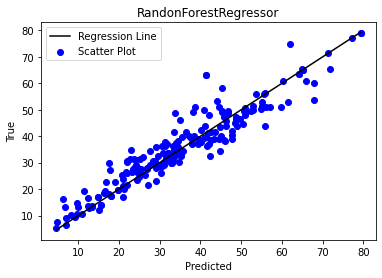

In [89]:
#Plotting Prediction
plt.scatter(y_test, y_pred_rfr,color='blue', label='Scatter Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label = 'Regression Line')
plt.title('RandonForestRegressor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

### K-fold cross validation

In [90]:
num_folds = 10      #k folds
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results5 = cross_val_score(Model_5,X, y, cv=kfold)
accuracy5=np.mean(abs(results5))
SD5=results5.std()
print('Average accuracy: ',accuracy5)
print('Standard Deviation: ',SD5)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.7178428374393822
Standard Deviation:  0.15758997487017642


### Hyperparameter Tunning

In [91]:
param_rand={'n_estimators':[20,50,100],
           'max_features':[1,2,3]}

grid_results=GridSearchCV(rfr,param_rand,cv=5)
grid_results.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [1, 2, 3],
                         'n_estimators': [20, 50, 100]})

In [92]:
cv_results_rfr=pd.DataFrame(grid_results.cv_results_)
cv_results_rfr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089350,0.018061,0.004997,0.000631,1,20,"{'max_features': 1, 'n_estimators': 20}",0.868105,0.875657,0.774933,0.863364,0.783510,0.833114,0.044261,9
1,0.188088,0.007458,0.012197,0.001937,1,50,"{'max_features': 1, 'n_estimators': 50}",0.866185,0.863637,0.829513,0.846394,0.787027,0.838551,0.028951,8
2,0.375983,0.010759,0.019988,0.000633,1,100,"{'max_features': 1, 'n_estimators': 100}",0.865542,0.863174,0.808545,0.846849,0.812623,0.839347,0.024385,7
3,0.083755,0.004061,0.006392,0.001742,2,20,"{'max_features': 2, 'n_estimators': 20}",0.886884,0.893541,0.852721,0.863515,0.829149,0.865162,0.023374,6
4,0.202884,0.011054,0.011393,0.002576,2,50,"{'max_features': 2, 'n_estimators': 50}",0.917104,0.900886,0.859064,0.886657,0.851099,0.882962,0.024847,4


In [93]:
rfr_score=grid_results.best_score_

print("best_score : ",rfr_score)
print("best_params : ",grid_results.best_params_)
print("best_estimator : ",grid_results.best_estimator_)

best_score :  0.8951383596605798
best_params :  {'max_features': 3, 'n_estimators': 100}
best_estimator :  RandomForestRegressor(max_features=3)


## 6.KNN Regressor

* K-Nearest Neighbour is a supervised learning algorithm that can be used for both classification and regression problems.
* This algorithm works by assuming the similarities between the new data point and available data points. Based on these * similarities, the new data points are put in the most similar categories. 
* It is also known as the lazy learner algorithm as it stores all the available datasets and classifies each new case with the help of K-neighbours.
* The new case is assigned to the nearest class with most similarities, and any distance function measures the distance between the data points.
* The distance function can be Euclidean, Minkowski, Manhattan, or Hamming distance, based on the requirement. 

In [94]:
# KNN Regressor
knn = KNeighborsRegressor()

# Fitting models on Training data
Model_6=knn.fit(X_train,y_train)

# Making predictions on Test data
y_pred_knn= knn.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_6=Model_6.score(X_train,y_train)         

#ACCURACY = TEST DATA SCORE 
Acc_6=Model_6.score(X_test, y_test)                 

#ROOT MEAN SQUARE ERROR
RMSE_6=np.sqrt(mean_squared_error(y_test, y_pred_knn))

#MEAN SQUARED ERROR
MSE_6=mean_squared_error(y_test, y_pred_knn)

#MEAN ABSOLUTE ERROR
MAE_6=mean_absolute_error(y_test, y_pred_knn)

#R2-Score
R2_6=r2_score(y_test, y_pred_knn)

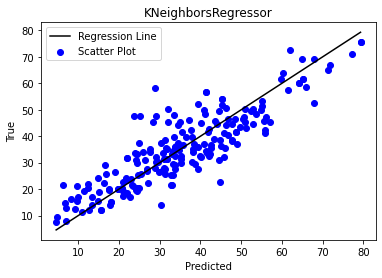

In [95]:
#Plotting Prediction
plt.scatter(y_test, y_pred_knn,color='blue', label='Scatter Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label = 'Regression Line')
plt.title('KNeighborsRegressor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

### K-fold cross validation

In [96]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results6 = cross_val_score(Model_6,X, y, cv=kfold)
accuracy6=np.mean(abs(results6))
SD6=results6.std()
print('Average accuracy: ',accuracy6)
print('Standard Deviation: ',SD6)

Average accuracy:  0.48563962489225243
Standard Deviation:  0.5288146698761542


C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### Hyperparameter Tunning

In [97]:
param_knn=[{'n_neighbors':[3,20,2],
          'metric':['canberra','euclidean','minkowski']}]

grid_search_knn=GridSearchCV(estimator=knn,
                         param_grid=param_knn,
                         cv=5
                        )
grid_search_knn.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': [3, 20, 2]}])

In [98]:
cv_results_svm=pd.DataFrame(grid_search_knn.cv_results_)
cv_results_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018989,0.032491,0.019789,0.017175,canberra,3,"{'metric': 'canberra', 'n_neighbors': 3}",0.680080,0.606289,0.541167,0.555682,0.486003,0.573844,0.065502,8
1,0.002398,0.000488,0.010993,0.001095,canberra,20,"{'metric': 'canberra', 'n_neighbors': 20}",0.661234,0.718582,0.671330,0.648357,0.633077,0.666516,0.029017,7
2,0.002602,0.000493,0.008790,0.001324,canberra,2,"{'metric': 'canberra', 'n_neighbors': 2}",0.652974,0.554579,0.486795,0.541624,0.441408,0.535476,0.071312,9
3,0.003397,0.000489,0.003798,0.000753,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.808285,0.822327,0.783701,0.768501,0.736623,0.783887,0.030145,1
4,0.003391,0.001014,0.006608,0.000492,euclidean,20,"{'metric': 'euclidean', 'n_neighbors': 20}",0.759083,0.741300,0.678527,0.671851,0.623466,0.694845,0.049345,5


In [99]:
knn_score=grid_search_knn.best_score_

print("best_score : ",knn_score)
print("best_params : ",grid_search_knn.best_params_)
print("best_estimator : ",grid_search_knn.best_estimator_)

best_score :  0.7838874601856098
best_params :  {'metric': 'euclidean', 'n_neighbors': 3}
best_estimator :  KNeighborsRegressor(metric='euclidean', n_neighbors=3)


## 7.SVM Regressor

* A support vector machine or SVM is a supervised learning algorithm that can also be used for classification and regression problems.
* However, it is primarily used for classification problems. 
* The goal of SVM is to create a hyperplane or decision boundary that can segregate datasets into different classes.
* The data points that help to define the hyperplane are known as support vectors, and hence it is named as support vector machine algorithm.
* Some real-life applications of SVM are face detection, image classification, Drug discovery, etc.

In [100]:
# SVM Regressor
svm = SVR()

# Fitting models on Training data
Model_7=svm.fit(X_train,y_train)

# Making predictions on Test data
y_pred_svm= svm.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_7=Model_7.score(X_train,y_train)          

#ACCURACY = TEST DATA SCORE 
Acc_7=Model_7.score(X_test, y_test)                 

#ROOT MEAN SQUARE ERROR
RMSE_7=np.sqrt(mean_squared_error(y_test, y_pred_svm))

#MEAN SQUARED ERROR
MSE_7=mean_squared_error(y_test, y_pred_svm)

#MEAN ABSOLUTE ERROR
MAE_7=mean_absolute_error(y_test, y_pred_svm)

#R2-Score
R2_7=r2_score(y_test, y_pred_svm)

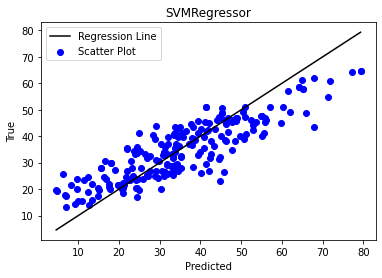

In [101]:
#Plotting Prediction
plt.scatter(y_test, y_pred_svm,color='blue', label='Scatter Plot')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', label = 'Regression Line')
plt.title('SVMRegressor')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.legend()
plt.show()

### K-fold cross validation

In [102]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results7 = cross_val_score(Model_7,X, y, cv=kfold)
accuracy7=np.mean(abs(results7))
SD7=results7.std()
print('Average accuracy: ',accuracy7)
print('Standard Deviation: ',SD7)

C:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.28272135380524804
Standard Deviation:  0.3381976584901714


### Hyperparameter Tunning

In [103]:
param_svm=[{'gamma':[1e-2,1e-3,1e-4],
           'C':[1,10,100,1000]}]

grid_search_svm=GridSearchCV(estimator=svm,
                         param_grid=param_svm,
                         cv=5
                        )
grid_search_svm.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [104]:
cv_results_svm=pd.DataFrame(grid_search_svm.cv_results_)
cv_results_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.039576,0.006340,0.006996,0.001095,1,0.01,"{'C': 1, 'gamma': 0.01}",0.537823,0.540017,0.471504,0.508397,0.465753,0.504699,0.031550,9
1,0.036782,0.000403,0.005597,0.000800,1,0.001,"{'C': 1, 'gamma': 0.001}",0.095645,0.090409,0.077806,0.081403,0.089522,0.086957,0.006459,11
2,0.038974,0.004337,0.006796,0.001938,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.010220,0.003991,-0.007473,0.003951,0.009581,0.004054,0.006347,12
3,0.038977,0.001095,0.006596,0.001199,10,0.01,"{'C': 10, 'gamma': 0.01}",0.807074,0.791495,0.687031,0.760653,0.653405,0.739932,0.059802,4
4,0.036978,0.001095,0.006996,0.001896,10,0.001,"{'C': 10, 'gamma': 0.001}",0.577915,0.578864,0.504859,0.542983,0.490464,0.539017,0.036444,8


In [105]:
svm_score=grid_search_svm.best_score_

print("best_score : ",svm_score)
print("best_params : ",grid_search_svm.best_params_)
print("best_estimator : ",grid_search_svm.best_estimator_)

best_score :  0.8492485968948023
best_params :  {'C': 1000, 'gamma': 0.01}
best_estimator :  SVR(C=1000, gamma=0.01)


### How are the two scores? Are they significantly different? Are they the same? Is the test score better than training score?

#### Train and test scores:

In [106]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression','Ridge Regression','Decision Tree','Random Forest','KNearest Neighbors','Support Vector Machine'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4, Acc_5, Acc_6,Acc_7]})
models.sort_values(by=['Train_Score','Test_Score'], ascending=False)


,Model,Train_Score,Test_Score
3,Decision Tree,0.993198,0.766166
4,Random Forest,0.981917,0.888667
5,KNearest Neighbors,0.873881,0.759463
6,Support Vector Machine,0.730150,0.730134
0,Linear Regression,0.723873,0.673905
2,Ridge Regression,0.723869,0.673724
1,Lasso Regression,0.694849,0.664183


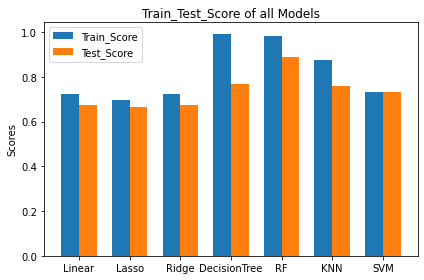

In [107]:
# train-test visualization
labels = ['Linear', 'Lasso', 'Ridge', 'DecisionTree', 'RF','KNN','SVM']
Train_Score= [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7]
Test_Score = [Acc_1, Acc_2,Acc_3, Acc_4, Acc_5, Acc_6,Acc_7]

x = np.arange(len(labels))             # the label locations
width = 0.35                           # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,Train_Score, width, label='Train_Score')
rects2 = ax.bar(x + width/2,Test_Score, width, label='Test_Score')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Train_Test_Score of all Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

##### Observations:-

* As per evaluation training scores are better than test scores mostly for all algorithms.
* Test scores are also good but as compared to training score,they are bit lower.
* Only SVM Algorithm gives same scores for training and testing.
* Decision tree and RMSE

### Evaluate the model on test data

#### Accuracy,RMSE,MSE and MAE scores:

In [120]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'Lasso Regression','Ridge Regression','Decision Tree','Random Forest','KNearest Neighbors','Support Vector Machine'],
    'RMSE':[RMSE_1,RMSE_2,RMSE_3,RMSE_4,RMSE_5,RMSE_6,RMSE_7],
    'MSE':[MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7],
    'MAE':[MAE_1,MAE_2,MAE_3,MAE_4,MAE_5,MAE_6,MAE_7],
    'R2':[R2_1,R2_2,R2_3,R2_4,R2_5,R2_6,R2_7]
    })
models.sort_values(by=['RMSE','MSE','MAE','R2'], ascending=False)

,Algorithm,RMSE,MSE,MAE,R2
1,Lasso Regression,9.089388,82.616977,7.319231,0.664183
2,Ridge Regression,8.959340,80.269766,7.048976,0.673724
0,Linear Regression,8.956849,80.225139,7.047189,0.673905
6,Support Vector Machine,8.148122,66.391887,6.579132,0.730134
5,KNearest Neighbors,7.692615,59.176319,5.953841,0.759463
3,Decision Tree,7.584680,57.527374,5.031749,0.766166
4,Random Forest,5.233533,27.389865,3.706592,0.888667


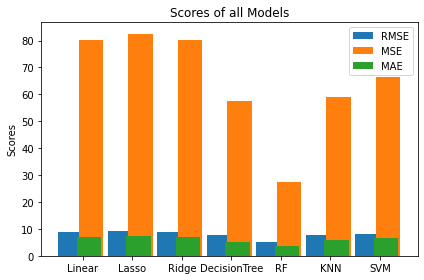

In [118]:
# metrics visualization
labels = ['Linear', 'Lasso', 'Ridge', 'DecisionTree', 'RF','KNN','SVM']
RMSE = [RMSE_1, RMSE_2,RMSE_3, RMSE_4, RMSE_5,RMSE_6,RMSE_7]
MSE = [MSE_1,MSE_2,MSE_3,MSE_4,MSE_5,MSE_6,MSE_7]
MAE = [MAE_1,MAE_2,MAE_3,MAE_4,MAE_5,MAE_6,MAE_7]


x = np.arange(len(labels))             # the label locations
width = 0.50                           # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x - width/2,RMSE, width, label='RMSE')
rects3 = ax.bar(x + width/3,MSE, width, label='MSE')
rects4 = ax.bar(x + width/4,MAE, width, label='MAE')



# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of all Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


fig.tight_layout()

plt.show()

##### Observations:-

* For better model performance the RMSE,MSE and MAE as small as possible.
* Smaller values of this metrics gives good approach towards model performance.
* So,as per this concept Random Forest Regressor gives low RMSE,MSE and MAE With better accuracy.
* After Random Forest,the decision tree and KNN algorithm gives good results.

#### K-Fold Validation scores:

In [110]:
models = pd.DataFrame({
    'Algorithm': ['Linear Regression', 'Lasso Regression','Ridge Regression','Decision Tree','Random Forest','KNearest Neighbors','Support Vector Machine'],
    'Avgerage_Acc': [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7],
    'Standard_Dev': [SD1,SD2,SD3,SD4,SD5,SD6,SD7]})
models.sort_values(by='Avgerage_Acc', ascending=False)

,Algorithm,Avgerage_Acc,Standard_Dev
4,Random Forest,0.717843,0.157590
2,Ridge Regression,0.656455,0.495858
0,Linear Regression,0.656455,0.495859
1,Lasso Regression,0.651478,0.489226
3,Decision Tree,0.605063,0.471049
5,KNearest Neighbors,0.485640,0.528815
6,Support Vector Machine,0.282721,0.338198


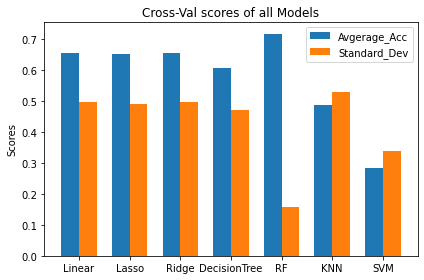

In [111]:
#cross-val score visualization
labels = ['Linear', 'Lasso', 'Ridge', 'DecisionTree', 'RF','KNN','SVM']
Avgerage_Acc = [accuracy1,accuracy2,accuracy3,accuracy4,accuracy5,accuracy6,accuracy7]
Standard_Dev = [SD1,SD2,SD3,SD4,SD5,SD6,SD7]

x = np.arange(len(labels))             # the label locations
width = 0.35                           # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,Avgerage_Acc, width, label='Avgerage_Acc')
rects2 = ax.bar(x + width/2,Standard_Dev, width, label='Standard_Dev')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Cross-Val scores of all Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

##### Observations:-

* Crosss-Val score of Random Forest is better than other models on the basis of Average accuracy and standard deviation.
* Standard deviation should be as small as possible ,Randome Forest Algorithm has Very small Stadard deviation than other Algorithms.

#### Hyper parameter tuning scores:

In [112]:
Tuned_models = pd.DataFrame({
    'Model': ['Lasso Regression','Ridge Regression','Decision Tree','Random Forest','KNearest Neighbors','Support Vector Machine'],
    'Tuned_Score': [lasso_score,ridge_score,dtr_score,rfr_score,knn_score,svm_score]})
Tuned_models.sort_values(by='Tuned_Score', ascending=False)


,Model,Tuned_Score
3,Random Forest,0.895138
5,Support Vector Machine,0.849249
2,Decision Tree,0.790752
4,KNearest Neighbors,0.783887
0,Lasso Regression,0.712895
1,Ridge Regression,-6.830808


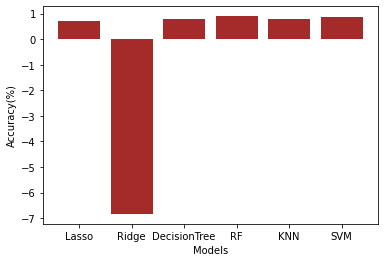

In [113]:
#tuned score visualization
height = [lasso_score,ridge_score,dtr_score,rfr_score,knn_score,svm_score]
bars = ('Lasso', 'Ridge', 'DecisionTree', 'RF','KNN','SVM')
y_pos = np.arange(len(bars))
plt.bar(bars, height,color='brown')
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.show()

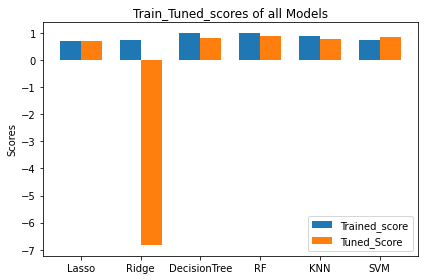

In [114]:
#train_tuned score visualizataion
labels = ['Lasso', 'Ridge', 'DecisionTree', 'RF','KNN','SVM']
Trained_score = [train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7]
Tuned_Score = [lasso_score,ridge_score,dtr_score,rfr_score,knn_score,svm_score]

x = np.arange(len(labels))             # the label locations
width = 0.35                           # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2,Trained_score, width, label='Trained_score')
rects2 = ax.bar(x + width/2,Tuned_Score, width, label='Tuned_Score')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Train_Tuned_scores of all Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

##### Observations:-

* After,tuning the all model,the Decision tree and Random Forest Model gives good scores.
* And Ridge Model gives very worst scores.

# Which algorithm performs better on this dataset and Why?


### Random Forest Regressor 
* It is the best choice for this problem based on its performance metrics RMSE,MSE and MAE having small values which are required for better model performance and with that ,it gives best Accuracy score on train,test ,cross-val and tuned data.